<a href="https://colab.research.google.com/github/fairuznawar122/World-Happiness-Classification/blob/main/World-Happiness-Classification%3A%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# import os
# import shutil

# # Define paths
# drive_path = "/content/drive/My Drive/kaggle.json"
# kaggle_path = "/root/.kaggle/kaggle.json"

# # Create .kaggle directory if it doesn't exist
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Copy the kaggle.json file
# shutil.copy(drive_path, kaggle_path)

# # Set the correct permissions
# os.chmod(kaggle_path, 600)
import os
os.environ['KAGGLE_USERNAME'] = "fariuznawar"
os.environ['KAGGLE_KEY'] = "6c2d1b94eb81cb2616870c4ea4764fda"

!kaggle datasets download -d mathurinache/world-happiness-report

Dataset URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
License(s): CC0-1.0
world-happiness-report.zip: Skipping, found more recently modified local copy (use --force to force download)


In [75]:
import zipfile
with zipfile.ZipFile("world-happiness-report.zip", "r") as zip_ref:
    zip_ref.extractall("world-happiness-report")


### Accessing the Data files





In [76]:
year = input("Enter the Year: ")
filename = "world-happiness-report/" + year + ".csv"

Enter the Year: 2018


In [77]:
import pandas as pd
df = pd.read_csv(filename)
df = df.dropna()
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


### Data Processing


In [78]:
if(year=="2015"):
  df.drop("Region", axis=1, inplace=True)
  df.drop("Happiness Rank", axis=1, inplace=True)
  df.drop("Dystopia Residual", axis=1, inplace=True)
  df.drop("Standard Error", axis=1, inplace=True)
  df = df.rename(columns={'Economy (GDP per Capita)': 'Economy'})
  df = df.rename(columns={'Trust (Government Corruption)': 'Trust'})
  df = df.rename(columns={'Health (Life Expectancy)': 'Health'})

if(year=="2018"):
  df.drop("Overall rank", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Score': 'Happiness Score'})
  df = df.rename(columns={'Country or region': 'Country'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'GDP per capita': 'Economy'})

if(year=="2020"):
  df.drop("Regional indicator", axis=1, inplace=True)
  df.drop("Standard error of ladder score", axis=1, inplace=True)
  df.drop("upperwhisker", axis=1, inplace=True)
  df.drop("lowerwhisker", axis=1, inplace=True)
  df.drop("Ladder score in Dystopia", axis=1, inplace=True)
  df.drop("Dystopia + residual", axis=1, inplace=True)
  df.drop("Explained by: Log GDP per capita", axis=1, inplace=True)
  df.drop("Explained by: Social support", axis=1, inplace=True)
  df.drop("Explained by: Healthy life expectancy", axis=1, inplace=True)
  df.drop("Explained by: Freedom to make life choices", axis=1, inplace=True)
  df.drop("Explained by: Generosity", axis=1, inplace=True)
  df.drop("Explained by: Perceptions of corruption", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Country name': 'Country'})
  df = df.rename(columns={'Ladder score': 'Happiness Score'})
  df = df.rename(columns={'Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Social support': 'Social Support'})
  df = df.rename(columns={'Logged GDP per capita': 'Economy'})

if(year=="2022"):
  df.drop("RANK", axis=1, inplace=True)
  df.drop("Whisker-high", axis=1, inplace=True)
  df.drop("Whisker-low", axis=1, inplace=True)
  df.drop("Dystopia (1.83) + residual", axis=1, inplace=True)
  #rename
  df = df.rename(columns={'Explained by: GDP per capita': 'Economy'})
  df = df.rename(columns={'Explained by: Social support': 'Social Support'})
  df = df.rename(columns={'Explained by: Healthy life expectancy': 'Health'})
  df = df.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'})
  df = df.rename(columns={'Explained by: Generosity': 'Generosity'})
  df = df.rename(columns={'Explained by: Perceptions of corruption': 'Trust'})
  df = df.rename(columns={'Happiness score': 'Happiness Score'})

  # To fix the numerical values in the data
  for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.replace(',', '.')

  # Convert all columns to numeric (excluding non-numeric columns like country names)
  for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle the case if a column can't be converted (keep it as is)
        pass
  df = df[:-1]

df

,Country,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [79]:
possible_column_names = ['Country', 'Country or region', 'Country name']

In [80]:
# Function to check, extract and delete the column
def extract_and_delete_column(df, possible_column_names):
    for name in possible_column_names:
        if name in df.columns:
            extracted_column = df[name]  # Extract column
            df.drop(name, axis=1, inplace=True)  # Delete the column from df
            print(f"✅ Column '{name}' extracted and deleted from df.")
            return extracted_column
    print(f"⚠️ Column not found from: {possible_column_names}")
    return None

final_df = extract_and_delete_column(df, possible_column_names)
final_df = pd.DataFrame(final_df)

split_size = len(final_df) // 3
categories = ['Strong Happy'] * split_size + ['Moderate Happy'] * split_size + ['Weak Happy'] * (len(final_df) - 2 * split_size)
final_df['Category'] = categories

final_df


✅ Column 'Country' extracted and deleted from df.


,Country,Category
0,Finland,Strong Happy
1,Norway,Strong Happy
2,Denmark,Strong Happy
3,Iceland,Strong Happy
4,Switzerland,Strong Happy
...,...,...
151,Yemen,Weak Happy
152,Tanzania,Weak Happy
153,South Sudan,Weak Happy
154,Central African Republic,Weak Happy


In [81]:
print(df.isnull().sum())

Happiness Score    0
Economy            0
Social Support     0
Health             0
Freedom            0
Generosity         0
Trust              0
dtype: int64


### Conditional Dependencies

In [82]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Example DataFrame
# df = pd.DataFrame({...})  # Your data here

# Initialize a matrix to store results
n_features = df.shape[1]
cond_mi_matrix = np.zeros((n_features, n_features))

# Calculate conditional mutual information for all pairs
for i in range(n_features):
    for j in range(n_features):
        if i != j:
            # Feature X and Y
            X = df.iloc[:, [i]]  # Feature X (1D array)
            Y = df.iloc[:, [j]]  # Feature Y (1D array)

            # Condition on all other features except i and j
            condition_features = df.drop(columns=[df.columns[i], df.columns[j]])

            # Flatten Y to 1D array
            Y = Y.values.flatten()

            # Calculate conditional mutual information
            cond_mi = mutual_info_regression(X=condition_features, y=Y)
            cond_mi_matrix[i, j] = cond_mi.mean()  # Average over conditions

# Convert to DataFrame for better readability
cond_mi_df = pd.DataFrame(cond_mi_matrix, index=df.columns, columns=df.columns)
print("Conditional Mutual Information Matrix:")
print(cond_mi_df)

Conditional Mutual Information Matrix:
                 Happiness Score   Economy  Social Support    Health  \
Happiness Score         0.000000  0.351046        0.243831  0.317688   
Economy                 0.330909  0.000000        0.280605  0.297958   
Social Support          0.338245  0.396608        0.000000  0.362107   
Health                  0.331694  0.329878        0.281806  0.000000   
Freedom                 0.414549  0.450921        0.330137  0.415811   
Generosity              0.437788  0.442556        0.337400  0.418764   
Trust                   0.429953  0.413608        0.337530  0.407379   

                  Freedom  Generosity     Trust  
Happiness Score  0.182475    0.125964  0.200037  
Economy          0.197359    0.114240  0.162619  
Social Support   0.189538    0.122929  0.201720  
Health           0.194435    0.122901  0.186598  
Freedom          0.000000    0.113120  0.162723  
Generosity       0.190557    0.000000  0.216149  
Trust            0.162464    0.135

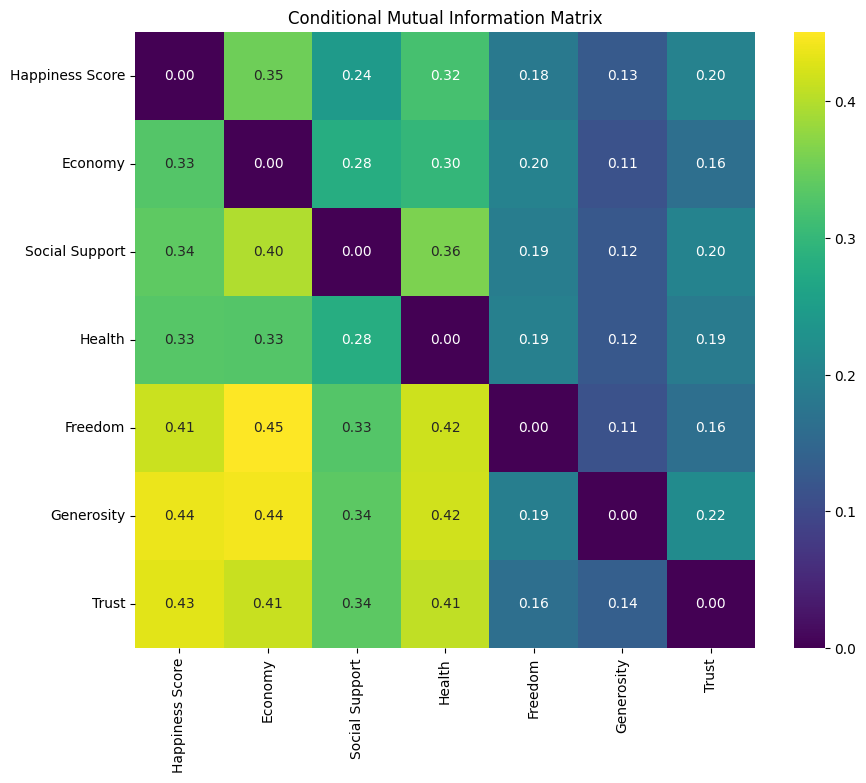

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for Conditional Dependency
plt.figure(figsize=(10, 8))
sns.heatmap(cond_mi_df, annot=True, cmap='viridis', fmt=".2f")
plt.title("Conditional Mutual Information Matrix")
plt.show()

Add Labels

In [86]:
final_df.drop(final_df.columns[0], axis=1, inplace=True)
df= pd.concat([df, final_df], axis=1)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,High,High,High,High,High,Medium,High,Strong Happy
1,High,High,High,High,High,Medium,High,Strong Happy
2,High,High,High,High,High,Medium,High,Strong Happy
3,High,High,High,High,High,Medium,Low,Strong Happy
4,High,High,High,High,High,Medium,High,Strong Happy
...,...,...,...,...,...,...,...,...
151,Low,Moderate,Medium,Medium,Medium,Low,Low,Weak Happy
152,Low,Moderate,Medium,Medium,Medium,Medium,Low,Weak Happy
153,Low,Moderate,Medium,Low,Low,Medium,Low,Weak Happy
154,Low,Low,Low,Low,Medium,Medium,Low,Weak Happy


### Categorizing the features : Using Decision Tree



In [84]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X = df[['Health', 'Freedom','Trust', 'Generosity']]  # Features that influence Economy
y = df['Economy']  # Economy is the target

tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)
# Extract unique thresholds from Decision Tree
thresholds = np.sort(tree_reg.tree_.threshold[tree_reg.tree_.threshold > 0])  # Remove unused splits

# **Pick only two meaningful thresholds** (1/3 and 2/3 positions)
if len(thresholds) >= 2:
    thresholds = [thresholds[len(thresholds) // 3], thresholds[2 * len(thresholds) // 3]]
else:
    print("Not enough splits from Decision Tree, using quantiles instead.")
    thresholds = list(df['Economy'].quantile([1/3, 2/3]))  # Fallback to quantiles

# Define bin edges and labels
bin_edges = [-np.inf] + list(thresholds) + [np.inf]
bin_labels = ['Low', 'Moderate', 'High']

# Categorize Economy into bins
df['Economy'] = pd.cut(df['Economy'], bins=bin_edges, labels=bin_labels)
df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,7.632,High,1.592,0.874,0.681,0.202,0.393,Strong Happy
1,7.594,High,1.582,0.861,0.686,0.286,0.340,Strong Happy
2,7.555,High,1.590,0.868,0.683,0.284,0.408,Strong Happy
3,7.495,High,1.644,0.914,0.677,0.353,0.138,Strong Happy
4,7.487,High,1.549,0.927,0.660,0.256,0.357,Strong Happy
...,...,...,...,...,...,...,...,...
151,3.355,Moderate,1.073,0.343,0.244,0.083,0.064,Weak Happy
152,3.303,Moderate,0.991,0.381,0.481,0.270,0.097,Weak Happy
153,3.254,Moderate,0.608,0.177,0.112,0.224,0.106,Weak Happy
154,3.083,Low,0.000,0.010,0.305,0.218,0.038,Weak Happy


### Categorizing the other features : Custom Bin ranges




In [85]:
# Number of bins/Categories you want
n_bins = 3
category_labels = ['Low', 'Medium', 'High']
# Create equal-width bins for each column
for column in df.columns:
    if column=="Economy" or column=="Category":
      continue
    min_val = df[column].min()- 1e-3  # Minimum value
    max_val = df[column].max()  # Maximum value
    bins = [min_val, min_val + (max_val - min_val) / 3, min_val + 2 * (max_val - min_val) / 3, max_val]
    df[column] = pd.cut(df[column], bins=bins, labels=category_labels)

df

,Happiness Score,Economy,Social Support,Health,Freedom,Generosity,Trust,Category
0,High,High,High,High,High,Medium,High,Strong Happy
1,High,High,High,High,High,Medium,High,Strong Happy
2,High,High,High,High,High,Medium,High,Strong Happy
3,High,High,High,High,High,Medium,Low,Strong Happy
4,High,High,High,High,High,Medium,High,Strong Happy
...,...,...,...,...,...,...,...,...
151,Low,Moderate,Medium,Medium,Medium,Low,Low,Weak Happy
152,Low,Moderate,Medium,Medium,Medium,Medium,Low,Weak Happy
153,Low,Moderate,Medium,Low,Low,Medium,Low,Weak Happy
154,Low,Low,Low,Low,Medium,Medium,Low,Weak Happy


### User Input Columns

In [48]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

df.drop("Category", axis=1, inplace=True)

selected_df = pd.DataFrame()
# Create multi-select widget for column selection
column_selector = widgets.SelectMultiple(
    options=df.columns,
    value=[df.columns[0]],  # Default selection
    description='Select Columns:',
    style={'description_width': 'initial'},  # Adjust description width
    layout=widgets.Layout(
        width='70%',  # Set width
        height='auto',  # Set height
        border='2px solid black',  # Border style
        padding='10px',  # Padding inside box
        margin='20px auto',  # Margin around box
    )
)

# Output widget to display the selected columns
output = widgets.Output()

def show_selected_columns(change):
    with output:
        output.clear_output()  # Clear previous output
        selected_columns = list(column_selector.value)  # Get selected columns

        if selected_columns:
            print()
            display(df[selected_columns].head())  # Show first 5 rows
        else:
            print("⚠️ No columns selected!")

# Attach the function to update on selection
column_selector.observe(show_selected_columns, names='value')

# Button to save the selected columns

def save_selected_columns(b):
    selected_columns = list(column_selector.value)

    if not selected_columns:
        print("⚠️ Please select at least one column!")
        return
    global selected_df
    # selected_df = pd.concat([df[selected_columns],selected_df], axis=1)
    selected_df = df[selected_columns]
    # print()
    # print()
    # print(selected_df.head())
    print("✅ Saved selected columns to \"selected_df\" dataframe!")




save_button = widgets.Button(
    description="💾 Save Selected Columns",
    button_style="info",  # 'success' = Green, 'info' = Blue, 'warning' = Orange, 'danger' = Red
    tooltip="Click to save selected columns",
    icon="check",  # Adds a checkmark icon
    layout=widgets.Layout(width='250px', height='40px'),  # Adjust button size
    margin='20px auto',  # Margin around box
)
print()
# save_button = widgets.Button(description="Confirm Selection")
save_button.on_click(save_selected_columns)
print()
print()
# Display everything
display(column_selector, output, save_button)


SelectMultiple(description='Select Columns:', index=(0,), layout=Layout(border='2px solid black', height='auto…

Output()

Button(button_style='info', description='💾 Save Selected Columns', icon='check', layout=Layout(height='40px', …

In [49]:
selected_df

""


In [50]:
df=selected_df
df= pd.concat([df, final_df], axis=1)
df

,Category
0,Strong Happy
1,Strong Happy
2,Strong Happy
3,Strong Happy
4,Strong Happy
...,...
151,Weak Happy
152,Weak Happy
153,Weak Happy
154,Weak Happy


### Naive Bayes Classifier